In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
import pandas as pd

from statsmodels.formula.api import ols

In [133]:
N = 10000
# generate theta
x = np.random.uniform(size=N)  * 2 * 0.4 + 0.4
betaStar = 1 # can modify 
sigmaTheta = 0.01
theta = x * betaStar + np.random.randn(N) * sigmaTheta


alphaStar = 2 # can modify 
muA = x * alphaStar + np.random.randn(N) * sigmaTheta


# generate mu's
muB = muA * theta
mu = np.array([muA, muB])
sigmaA = 0.3 # can modify, larger sigmaA makes the first estimator worse
# we have to set rho =0, because the dependence already appeared in mean, otherwise, there might be identifiablity issue
rho = 0.0

Sigma = np.array([[ sigmaA**2, rho*sigmaA**2 ], [rho*sigmaA**2, sigmaA**2]])

In [134]:
# generate responses
As, Bs = np.random.multivariate_normal(np.array([0, 0]), Sigma, N).T  + mu

In [135]:
ratio = Bs/As
# bi over muA
boMA = Bs/np.mean(As)


df = pd.DataFrame(data={'RA': As, 'RB': Bs, 'ratio': ratio, 'x': x, 'xRA': x*As, 'boMA': boMA})
df['adaptIndex'] = df['RB']/df['RA']

(-2.0, 4.0)

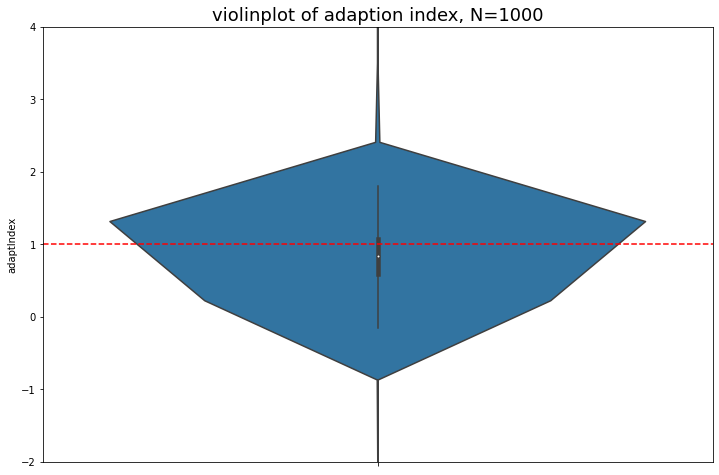

In [136]:
# Bi/Ai violinplot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(y="adaptIndex", data=df)
ax.axhline(y=1.0, color='r', linestyle='--')
ax.set_title("violinplot of adaption index, N=1000", fontsize=18)
ax.set_ylim(-2, 4)

In [137]:
# Fit OLS model for estimator 1
model = ols("ratio ~ x", df).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     563.8
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          2.71e-121
Time:                        21:55:38   Log-Likelihood:                -12919.
No. Observations:               10000   AIC:                         2.584e+04
Df Residuals:                    9998   BIC:                         2.586e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1209      0.032      3.817      0.0

In [138]:
# Fit the model for estimator 2
model2 = ols("RB ~ xRA + RA", df).fit()

# Print the summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RB   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.470e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:55:38   Log-Likelihood:                -3087.4
No. Observations:               10000   AIC:                             6181.
Df Residuals:                    9997   BIC:                             6203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9005      0.015     59.478      0.0

In [139]:
# Fit the model for estimator 3

# first regress Ai on Xi
model3_1 = ols("RA ~ x", df).fit()

df['predicted_xRA'] = (model3_1.params[1] * x + model3_1.params[0])*x


model3_2 = ols("RB ~ predicted_xRA + RA", df).fit()

# Print the summary
print(model3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RB   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.156e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:55:38   Log-Likelihood:                -2049.5
No. Observations:               10000   AIC:                             4105.
Df Residuals:                    9997   BIC:                             4127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0086      0.010     -0.893

In [140]:
model3_1.params[1]

1.9952813714962472

In [116]:
model3_1.fittedvalues

0        1.732352
1        1.491295
2        1.341990
3        1.174872
4        1.113997
           ...   
99995    1.180463
99996    1.812915
99997    1.582016
99998    1.913653
99999    0.947299
Length: 100000, dtype: float64